<a href="https://colab.research.google.com/github/MethEthPro/colab/blob/main/100DL/dropouts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

# REGRESSION PROBLEM

## DATA

In [3]:
import numpy as np

In [4]:
X_train = np.linspace(-1, 1, 20)

In [5]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [6]:
X_test = np.linspace(-1, 1, 20)

In [7]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

In [8]:
import matplotlib.pyplot as plt


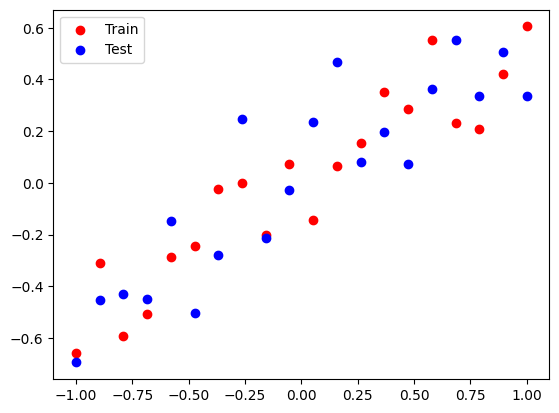

In [9]:
plt.scatter(X_train, y_train, c='red' , label='Train')
plt.scatter(X_test, y_test, c='blue' , label = 'Test')
plt.legend()
plt.show()

## MODEL without dropouts

In [87]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [88]:
X_train_tensor

tensor([-1.0000, -0.8947, -0.7895, -0.6842, -0.5789, -0.4737, -0.3684, -0.2632,
        -0.1579, -0.0526,  0.0526,  0.1579,  0.2632,  0.3684,  0.4737,  0.5789,
         0.6842,  0.7895,  0.8947,  1.0000])

In [89]:
X_train_tensor.shape

torch.Size([20])

In [90]:
X_train_tensor = X_train_tensor.view(-1,1)
X_test_tensor = X_test_tensor.view(-1,1)
y_train_tensor = y_train_tensor.view(-1)
y_test_tensor = y_test_tensor.view(-1)

In [91]:
X_train_tensor.shape

torch.Size([20, 1])

In [92]:
X_train_tensor

tensor([[-1.0000],
        [-0.8947],
        [-0.7895],
        [-0.6842],
        [-0.5789],
        [-0.4737],
        [-0.3684],
        [-0.2632],
        [-0.1579],
        [-0.0526],
        [ 0.0526],
        [ 0.1579],
        [ 0.2632],
        [ 0.3684],
        [ 0.4737],
        [ 0.5789],
        [ 0.6842],
        [ 0.7895],
        [ 0.8947],
        [ 1.0000]])

In [93]:
from torch import nn

In [94]:
class RegressionV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=1, out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128, out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128,out_features=1),
    )

  def forward(self,x):
    return self.layer_stack(x)

In [95]:
mymodel = RegressionV1()

In [96]:
mymodel.layer_stack[0].weight

Parameter containing:
tensor([[-0.9934],
        [-0.1513],
        [ 0.1041],
        [ 0.5921],
        [-0.1605],
        [-0.9487],
        [ 0.2734],
        [ 0.1013],
        [ 0.1738],
        [-0.4257],
        [-0.7012],
        [-0.2100],
        [ 0.4057],
        [-0.7062],
        [-0.9349],
        [ 0.0254],
        [-0.4111],
        [-0.3760],
        [-0.5627],
        [-0.0654],
        [ 0.6481],
        [ 0.2813],
        [ 0.0805],
        [-0.5767],
        [-0.6792],
        [ 0.1099],
        [ 0.6828],
        [ 0.2958],
        [ 0.7273],
        [-0.6971],
        [ 0.3528],
        [-0.4347],
        [ 0.7822],
        [ 0.6467],
        [-0.1362],
        [ 0.5716],
        [-0.8466],
        [ 0.8825],
        [ 0.2941],
        [ 0.3959],
        [-0.6125],
        [-0.0858],
        [ 0.2300],
        [ 0.7277],
        [ 0.9331],
        [-0.8001],
        [ 0.0436],
        [ 0.6315],
        [ 0.4376],
        [ 0.9237],
        [-0.0195],
        [

In [97]:
y_logits = mymodel(X_train_tensor)
y_pred = y_logits.flatten()
y_pred

tensor([ 0.0181,  0.0204,  0.0255,  0.0307,  0.0338,  0.0361,  0.0343,  0.0291,
         0.0230,  0.0120,  0.0042, -0.0032, -0.0139, -0.0214, -0.0231, -0.0199,
        -0.0113, -0.0028,  0.0061,  0.0162], grad_fn=<ViewBackward0>)

In [98]:
y_train

array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , -0.2443 ,
       -0.02445,  0.00135, -0.2006 ,  0.07475, -0.1422 ,  0.06515,
        0.15265,  0.3521 ,  0.28415,  0.5524 ,  0.23115,  0.20835,
        0.4211 ,  0.60485])

In [99]:
loss_fnc = nn.MSELoss()
optimizer = torch.optim.Adam(params = mymodel.parameters(),
                             lr = 0.01)

In [100]:
epochs = 500


train_loss = []
test_loss = []


for i in range(epochs):
  mymodel.train()

  y_logits = mymodel(X_train_tensor)
  y_pred = y_logits.flatten()

  loss = loss_fnc(y_pred, y_train_tensor)

  train_loss.append(loss.item())

  # print(f"epoch : {i} , train_loss : {loss.item()}")

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  mymodel.eval()
  with torch.inference_mode():
    y_logits = mymodel(X_test_tensor)
    y_pred = y_logits.flatten()

    loss = loss_fnc(y_pred, y_test_tensor)

    test_loss.append(loss.item())
    # print(f"epoch : {i} , test_loss : {loss.item()}")



In [101]:
with torch.inference_mode():
  y_pred = mymodel(X_train_tensor).flatten()

In [102]:
y_pred = np.array(y_pred)

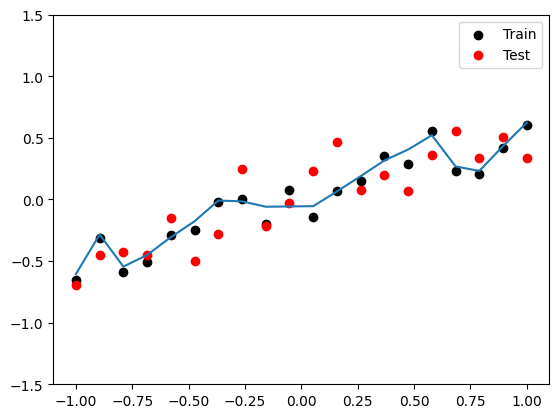

In [103]:
plt.figure()
plt.scatter(X_train, y_train, c='black',label='Train')
plt.scatter(X_test, y_test, c='red', label='Test')
plt.plot(X_test,y_pred)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

SO WE CAN CLEARLY SEE THAT OUR MODEL IS OVERFITTING

THE REGRESSION LINE IS TOTALLY DEPENDENT ON THE TRAIN POINTS

WE CAN ALSO CONFIRM THIS BY PLOTTING TRAIN VS TEST LOSS

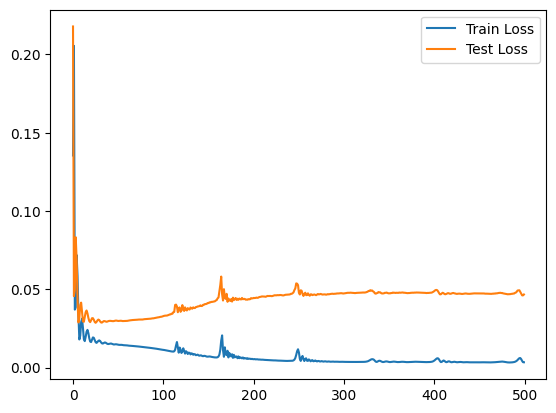

In [105]:
plt.plot(train_loss, label ='Train Loss')
plt.plot(test_loss, label = "Test Loss")
plt.legend()
plt.show()

## model with dropouts

In [112]:
class RegressionV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=1, out_features=128),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(in_features=128, out_features=128),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(in_features=128, out_features=1)
    )
  def forward(self,x):
    return self.layer_stack(x)

In [113]:
mymodel = RegressionV2()

In [114]:
loss_fnc = nn.MSELoss()
optimizer = torch.optim.Adam(params = mymodel.parameters(),
                             lr = 0.01)

In [115]:
epochs = 500


train_loss = []
test_loss = []


for i in range(epochs):
  mymodel.train()

  y_logits = mymodel(X_train_tensor)
  y_pred = y_logits.flatten()

  loss = loss_fnc(y_pred, y_train_tensor)

  train_loss.append(loss.item())

  # print(f"epoch : {i} , train_loss : {loss.item()}")

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  mymodel.eval()
  with torch.inference_mode():
    y_logits = mymodel(X_test_tensor)
    y_pred = y_logits.flatten()

    loss = loss_fnc(y_pred, y_test_tensor)

    test_loss.append(loss.item())
    # print(f"epoch : {i} , test_loss : {loss.item()}")



In [116]:
with torch.inference_mode():
  y_pred = mymodel(X_train_tensor).flatten()

y_pred = np.array(y_pred)

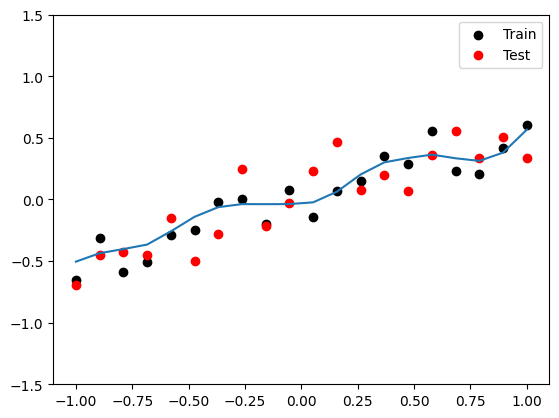

In [117]:
plt.figure()
plt.scatter(X_train, y_train, c='black',label='Train')
plt.scatter(X_test, y_test, c='red', label='Test')
plt.plot(X_test,y_pred)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

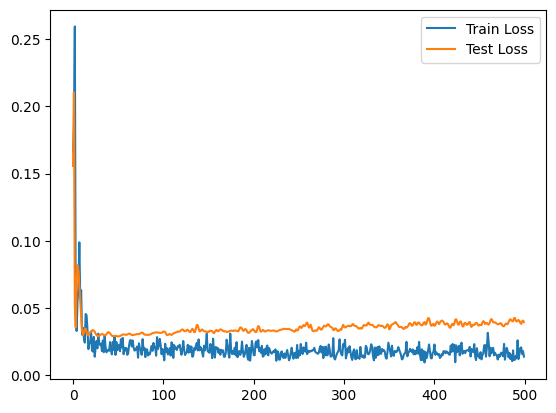

In [118]:
plt.plot(train_loss, label ='Train Loss')
plt.plot(test_loss, label = "Test Loss")
plt.legend()
plt.show()

so we prevented overfitting with he help of dropouts

now lets try another model , but this time with dropout probability as 50% i,e 0.5

In [134]:
class RegressionV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=1, out_features=128),
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(in_features=128, out_features=128),
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(in_features=128, out_features=1)
    )
  def forward(self,x):
    return self.layer_stack(x)

In [135]:
mymodel = RegressionV2()

In [136]:
loss_fnc = nn.MSELoss()
optimizer = torch.optim.Adam(params = mymodel.parameters(),
                             lr = 0.01)

In [137]:
epochs = 500


train_loss = []
test_loss = []


for i in range(epochs):
  mymodel.train()

  y_logits = mymodel(X_train_tensor)
  y_pred = y_logits.flatten()

  loss = loss_fnc(y_pred, y_train_tensor)

  train_loss.append(loss.item())

  # print(f"epoch : {i} , train_loss : {loss.item()}")

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  mymodel.eval()
  with torch.inference_mode():
    y_logits = mymodel(X_test_tensor)
    y_pred = y_logits.flatten()

    loss = loss_fnc(y_pred, y_test_tensor)

    test_loss.append(loss.item())
    # print(f"epoch : {i} , test_loss : {loss.item()}")



In [138]:
with torch.inference_mode():
  y_pred = mymodel(X_train_tensor).flatten()

y_pred = np.array(y_pred)

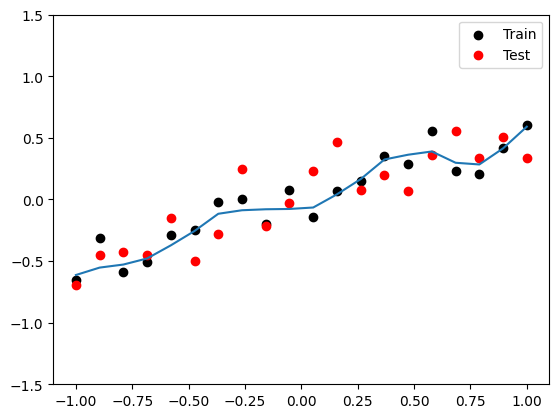

In [139]:
plt.figure()
plt.scatter(X_train, y_train, c='black',label='Train')
plt.scatter(X_test, y_test, c='red', label='Test')
plt.plot(X_test,y_pred)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

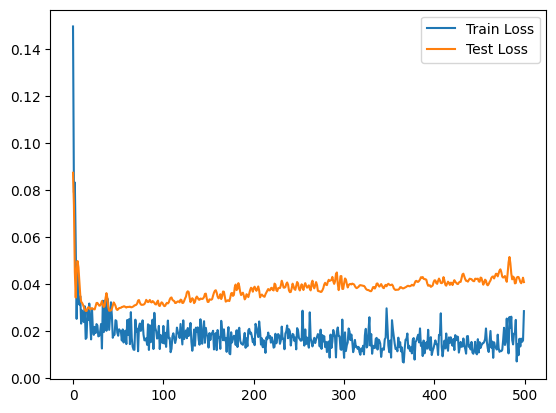

In [140]:
plt.plot(train_loss, label ='Train Loss')
plt.plot(test_loss, label = "Test Loss")
plt.legend()
plt.show()

Conclusion: Increasing dropout (p=0.5) reduces overfitting, but it also makes training less stable and increases training/test loss.

Higher dropout leads to underfitting, reducing the model's ability to capture finer details.

# Classification Problem

we have 2 input columns and one output column

In [141]:
X = np.array([[-1.58986e-01,  4.23977e-01],
       [-3.47926e-01,  4.70760e-01],
       [-5.04608e-01,  3.53801e-01],
       [-5.96774e-01,  1.14035e-01],
       [-5.18433e-01, -1.72515e-01],
       [-2.92627e-01, -2.07602e-01],
       [-1.58986e-01, -4.38596e-02],
       [-5.76037e-02,  1.43275e-01],
       [-7.14286e-02,  2.71930e-01],
       [-2.97235e-01,  3.47953e-01],
       [-4.17051e-01,  2.01754e-01],
       [-4.40092e-01,  8.77193e-03],
       [-3.24885e-01, -3.21637e-02],
       [-2.46544e-01,  5.55556e-02],
       [-2.18894e-01,  2.01754e-01],
       [-3.43318e-01,  1.60819e-01],
       [-5.09217e-01,  7.89474e-02],
       [-3.84793e-01, -9.06433e-02],
       [-1.49770e-01,  1.25731e-01],
       [-1.95853e-01,  3.24561e-01],
       [-3.91705e-02, -2.19298e-01],
       [-1.08295e-01, -3.01170e-01],
       [-1.86636e-01, -3.30409e-01],
       [-2.18894e-01, -4.23977e-01],
       [-8.06452e-02, -5.64327e-01],
       [ 6.68203e-02, -5.17544e-01],
       [ 9.44700e-02, -3.24561e-01],
       [ 1.86636e-01, -1.66667e-01],
       [ 6.22120e-02, -7.30994e-02],
       [ 2.07373e-02, -1.95906e-01],
       [ 2.99539e-02, -3.42105e-01],
       [-9.90783e-02, -3.77193e-01],
       [-6.91244e-03, -4.64912e-01],
       [ 1.31336e-01, -4.29825e-01],
       [ 2.32719e-01, -1.95906e-01],
       [ 8.52535e-02, -8.47953e-02],
       [-1.31336e-01, -2.36842e-01],
       [ 2.30415e-03, -1.25731e-01],
       [ 1.22120e-01, -2.92398e-03],
       [-3.47926e-01, -3.12865e-01],
       [-2.28111e-01, -1.25731e-01],
       [-7.60369e-02,  1.46199e-02],
       [ 4.37788e-02,  2.04678e-02],
       [ 1.15207e-02,  1.54971e-01],
       [-4.17051e-01, -1.60819e-01],
       [-3.15668e-01, -3.18713e-01],
       [ 1.26728e-01, -2.19298e-01],
       [ 2.05069e-01, -3.12865e-01],
       [ 2.18894e-01, -4.59064e-01],
       [ 7.14286e-02, -6.46199e-01],
       [-1.31336e-01, -6.05263e-01],
       [-2.09677e-01, -5.81871e-01],
       [-2.28111e-01, -4.29825e-01],
       [-1.45161e-01, -4.12281e-01],
       [-6.68203e-02, -4.82456e-01],
       [ 1.35945e-01, -5.11696e-01],
       [ 2.69585e-01, -4.06433e-01],
       [ 2.97235e-01, -2.95322e-01],
       [ 2.74194e-01, -1.72515e-01],
       [ 2.55760e-01, -4.97076e-02],
       [ 2.23502e-01, -4.97076e-02],
       [ 1.82028e-01, -8.47953e-02],
       [ 1.58986e-01, -1.54971e-01],
       [ 7.14286e-02, -2.13450e-01],
       [ 1.61290e-02, -2.66082e-01],
       [-2.53456e-02, -3.83041e-01],
       [-1.15207e-02, -4.82456e-01],
       [-2.30415e-03, -5.05848e-01],
       [ 2.53456e-02, -5.11696e-01],
       [ 2.53456e-02, -5.58480e-01],
       [ 1.15207e-02, -6.57895e-01],
       [-4.83871e-02, -6.46199e-01],
       [-8.52535e-02, -5.52632e-01],
       [-9.90783e-02, -5.00000e-01],
       [-1.61290e-02, -4.23977e-01],
       [ 1.31336e-01, -3.59649e-01],
       [ 2.23502e-01, -3.71345e-01],
       [ 2.92627e-01, -3.01170e-01],
       [ 2.60369e-01, -2.07602e-01],
       [ 2.00461e-01, -2.25146e-01],
       [ 1.72811e-01, -2.71930e-01],
       [-1.31336e-01,  9.06433e-02],
       [-1.49770e-01,  7.30994e-02],
       [-2.41935e-01,  6.14035e-02],
       [-3.01843e-01,  1.78363e-01],
       [-2.97235e-01,  1.95906e-01],
       [-2.74194e-01,  3.07018e-01],
       [-3.24885e-01,  2.95322e-01],
       [-3.98618e-01,  2.66082e-01],
       [-4.35484e-01,  1.60819e-01],
       [-4.72350e-01,  7.89474e-02],
       [-3.38710e-01,  4.38596e-02],
       [-2.69585e-01,  4.38596e-02],
       [-2.55760e-01,  1.02339e-01],
       [-1.68203e-01,  2.66082e-01],
       [-1.12903e-01,  3.01170e-01],
       [-3.91705e-02,  3.47953e-01],
       [-1.26728e-01,  4.41520e-01],
       [-2.32719e-01,  4.41520e-01],
       [-3.38710e-01,  4.18129e-01],
       [-4.12442e-01,  3.53801e-01],
       [-5.09217e-01,  2.19298e-01],
       [-5.41475e-01,  1.46199e-02],
       [-5.04608e-01, -1.25731e-01],
       [-4.90783e-01, -1.43275e-01],
       [-3.61751e-01, -1.37427e-01],
       [-2.69585e-01, -8.47953e-02],
       [-2.23502e-01, -7.89474e-02],
       [-1.86636e-01, -3.80117e-02],
       [-1.54378e-01, -8.77193e-03],
       [-1.12903e-01,  5.55556e-02],
       [-8.52535e-02,  1.37427e-01],
       [-8.52535e-02,  2.77778e-01],
       [-1.68203e-01,  3.01170e-01],
       [-1.91244e-01,  1.95906e-01],
       [-1.40553e-01, -4.97076e-02],
       [-2.99539e-02,  6.72515e-02],
       [-2.00461e-01, -2.30994e-01],
       [-1.08295e-01, -8.47953e-02],
       [ 3.45622e-02,  6.72515e-02],
       [ 8.06452e-02,  1.19883e-01],
       [-3.85369e-01,  3.30409e-02],
       [-3.81221e-01,  1.31287e-01],
       [-3.52189e-01,  2.58187e-01],
       [-3.54263e-01,  3.64620e-01],
       [-4.14401e-01, -6.92982e-02],
       [-4.99424e-01, -3.24561e-02],
       [-2.98272e-01, -9.79532e-02],
       [-3.16935e-01, -1.83918e-01],
       [-3.68779e-01, -2.90351e-01],
       [-3.56336e-01, -3.96784e-01],
       [-2.71313e-01,  4.38596e-03],
       [-1.77995e-01,  8.62573e-02],
       [-2.46429e-01,  1.43567e-01],
       [-2.50576e-01,  2.29532e-01],
       [-2.21544e-01,  3.76901e-01],
       [-2.15323e-01,  2.95029e-01],
       [-1.30300e-01,  2.17251e-01],
       [-2.07028e-01,  2.89474e-02],
       [-9.71198e-02,  2.13158e-01],
       [-3.90553e-02,  2.58187e-01],
       [ 1.90092e-02,  4.01462e-01],
       [-3.69816e-02,  4.21930e-01],
       [-6.39401e-02,  3.31871e-01],
       [-1.30300e-01,  3.76901e-01],
       [-3.75000e-01, -4.37719e-01],
       [-3.95737e-01, -3.51754e-01],
       [-3.54263e-01, -2.08480e-01],
       [-4.37212e-01, -3.76316e-01],
       [-4.80760e-01, -5.03216e-01],
       [-4.10253e-01, -4.66374e-01],
       [-2.48502e-01, -2.57602e-01],
       [-2.27765e-01, -3.14912e-01],
       [-2.83756e-01, -3.84503e-01],
       [-2.92051e-01, -4.54094e-01],
       [-3.37673e-01, -5.19591e-01],
       [-2.77535e-01, -5.48246e-01],
       [-2.07028e-01, -5.35965e-01],
       [-1.86290e-01, -4.78655e-01],
       [-1.32373e-01, -5.07310e-01],
       [-1.77995e-01, -2.98538e-01],
       [-1.65553e-01, -1.75731e-01],
       [-1.61406e-01, -1.26608e-01],
       [ 3.45622e-04,  2.58187e-01],
       [ 7.91475e-02,  3.56433e-01],
       [-2.66129e-02,  1.80409e-01],
       [-5.35714e-02,  7.80702e-02],
       [-1.41705e-02, -5.29240e-02],
       [-7.01613e-02, -1.63450e-01],
       [-6.39401e-02, -2.94444e-01],
       [-3.07604e-02, -4.66374e-01],
       [-5.77189e-02, -5.27778e-01],
       [-5.35714e-02, -3.96784e-01],
       [ 5.21889e-02, -4.17251e-01],
       [-1.62442e-02, -1.67544e-01],
       [-6.39401e-02, -8.56725e-02],
       [-6.18664e-02, -1.60819e-02],
       [-3.80184e-03,  4.38596e-03],
       [ 4.18203e-02,  2.04971e-01],
       [ 7.91475e-02,  1.92690e-01],
       [ 4.59677e-02,  2.54094e-01],
       [ 1.18548e-01,  1.92690e-01],
       [ 1.10253e-01,  8.62573e-02],
       [ 1.08180e-01, -6.92982e-02],
       [ 1.66244e-01, -2.42690e-02],
       [ 1.41359e-01,  6.57895e-02],
       [ 1.43433e-01,  1.68129e-01],
       [ 1.70392e-01,  1.92690e-01],
       [ 1.08180e-01,  2.99123e-01],
       [ 1.18548e-01,  3.19591e-01],
       [ 1.26843e-01,  3.93275e-01],
       [-8.67512e-02,  4.21930e-01],
       [-4.73502e-02,  5.07895e-01],
       [ 2.52304e-02,  5.20175e-01],
       [ 6.25576e-02,  5.52924e-01],
       [-5.87558e-03,  4.42398e-01],
       [-5.14977e-02,  5.73392e-01],
       [-8.05300e-02,  5.07895e-01],
       [-1.53111e-01,  5.52924e-01],
       [-1.11636e-01,  5.48830e-01],
       [-1.63479e-01,  4.91520e-01],
       [-2.52650e-01, -1.88012e-01],
       [-2.46429e-01, -3.65497e-02],
       [-3.21083e-01, -4.33626e-01],
       [-3.31452e-01, -6.05556e-01],
       [-3.85369e-01, -5.15497e-01],
       [-3.99885e-01, -6.21930e-01],
       [-1.24078e-01, -1.26608e-01],
       [-3.16935e-01, -2.28947e-01],
       [-2.94124e-01, -1.34795e-01],
       [-1.53111e-01,  1.84503e-01]])

In [142]:
y = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0.])

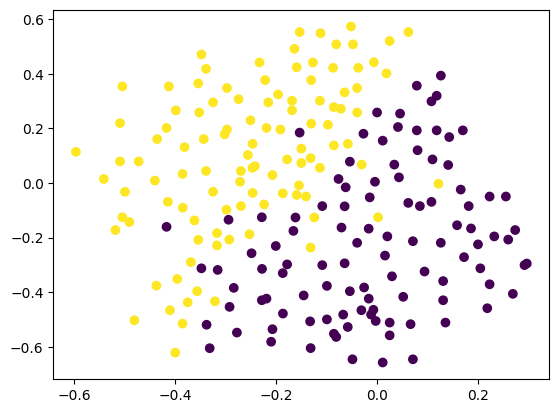

In [143]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

so we have a simple classification problem at hand


In [148]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [149]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [150]:
X_train_tensor.shape

torch.Size([168, 2])

## Model without dropouts

In [178]:
class ClassificationV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=2, out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128, out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128, out_features=1),
        nn.Sigmoid()
    )
  def forward(self,x):
    return self.layer_stack(x)


In [179]:
mymodel = ClassificationV1()

In [180]:
y_logits = mymodel(X_train_tensor)
y_pred = y_logits.flatten()
y_pred.shape

torch.Size([168])

In [181]:
y_train_tensor.shape

torch.Size([168])

In [182]:
loss_fnc = nn.BCELoss()
optimizer = torch.optim.Adam(params = mymodel.parameters(),
                             lr=0.01)

In [183]:
epochs = 500


train_loss = []
test_loss = []


for i in range(epochs):
  mymodel.train()

  y_logits = mymodel(X_train_tensor)
  y_pred = y_logits.flatten()

  loss = loss_fnc(y_pred, y_train_tensor)

  train_loss.append(loss.item())

  # print(f"epoch : {i} , train_loss : {loss.item()}")

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  mymodel.eval()
  with torch.inference_mode():
    y_logits = mymodel(X_test_tensor)
    y_pred = y_logits.flatten()

    loss = loss_fnc(y_pred, y_test_tensor)

    test_loss.append(loss.item())
    # print(f"epoch : {i} , test_loss : {loss.item()}")



In [184]:
class PyTorchClassifierWrapper:
    def __init__(self, model):
        self.model = model
        self.model.eval()  # Set model to evaluation mode

    def predict(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32)  # Convert input to tensor
        with torch.no_grad():
            logits = self.model(X_tensor)  # Forward pass
            y_pred = (logits >= 0.5).float()  # Apply threshold (0.5 for sigmoid)
        return y_pred.numpy().astype(int)  # Convert to numpy & int for mlxtend


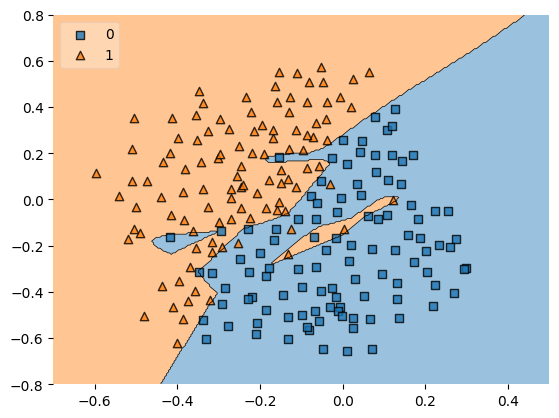

In [185]:
from mlxtend.plotting import plot_decision_regions

wrapped_model = PyTorchClassifierWrapper(mymodel)


plot_decision_regions(X,y.astype('int'),clf = wrapped_model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.show()

so we can see the overfitting here

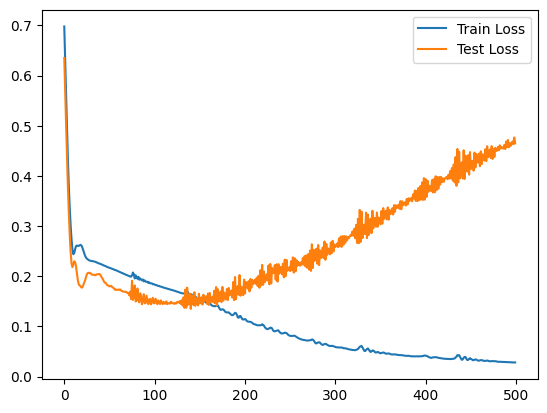

In [186]:
plt.plot(train_loss, label ='Train Loss')
plt.plot(test_loss, label = "Test Loss")
plt.legend()
plt.show()

## model with dropouts

In [194]:
class ClassificationV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=2, out_features=128),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(in_features=128, out_features=128),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(in_features=128,out_features=1),
        nn.Sigmoid()
    )
  def forward(self,x):
    return self.layer_stack(x)

In [195]:
mymodel = ClassificationV2()

In [196]:
loss_fnc = nn.BCELoss()
optimizer = torch.optim.Adam(params = mymodel.parameters(),
                             lr=0.01)

epochs = 500


train_loss = []
test_loss = []


for i in range(epochs):
  mymodel.train()

  y_logits = mymodel(X_train_tensor)
  y_pred = y_logits.flatten()

  loss = loss_fnc(y_pred, y_train_tensor)

  train_loss.append(loss.item())

  # print(f"epoch : {i} , train_loss : {loss.item()}")

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  mymodel.eval()
  with torch.inference_mode():
    y_logits = mymodel(X_test_tensor)
    y_pred = y_logits.flatten()

    loss = loss_fnc(y_pred, y_test_tensor)

    test_loss.append(loss.item())
    # print(f"epoch : {i} , test_loss : {loss.item()}")



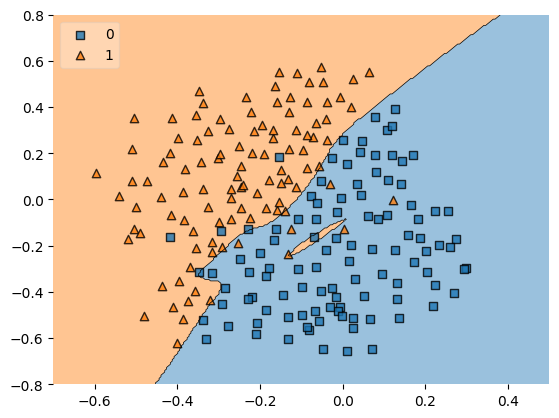

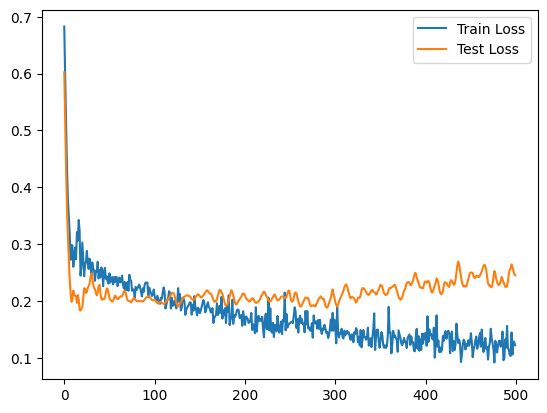

In [197]:
from mlxtend.plotting import plot_decision_regions

wrapped_model = PyTorchClassifierWrapper(mymodel)


plot_decision_regions(X,y.astype('int'),clf = wrapped_model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.show()

plt.plot(train_loss, label ='Train Loss')
plt.plot(test_loss, label = "Test Loss")
plt.legend()
plt.show()

still some overfitting is there
so lets increase the dropout ratio

In [198]:
class ClassificationV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=2, out_features=128),
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(in_features=128, out_features=128),
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(in_features=128,out_features=1),
        nn.Sigmoid()
    )
  def forward(self,x):
    return self.layer_stack(x)

In [199]:
mymodel = ClassificationV3()

In [200]:
loss_fnc = nn.BCELoss()
optimizer = torch.optim.Adam(params = mymodel.parameters(),
                             lr=0.01)

epochs = 500


train_loss = []
test_loss = []


for i in range(epochs):
  mymodel.train()

  y_logits = mymodel(X_train_tensor)
  y_pred = y_logits.flatten()

  loss = loss_fnc(y_pred, y_train_tensor)

  train_loss.append(loss.item())

  # print(f"epoch : {i} , train_loss : {loss.item()}")

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  mymodel.eval()
  with torch.inference_mode():
    y_logits = mymodel(X_test_tensor)
    y_pred = y_logits.flatten()

    loss = loss_fnc(y_pred, y_test_tensor)

    test_loss.append(loss.item())
    # print(f"epoch : {i} , test_loss : {loss.item()}")



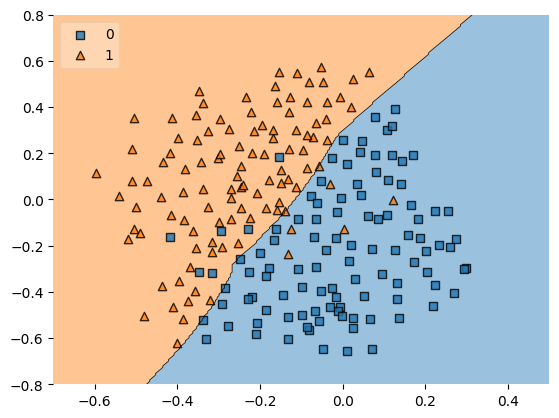

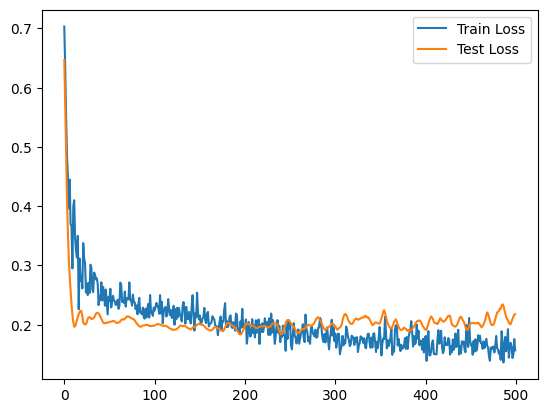

In [201]:
from mlxtend.plotting import plot_decision_regions

wrapped_model = PyTorchClassifierWrapper(mymodel)


plot_decision_regions(X,y.astype('int'),clf = wrapped_model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.show()

plt.plot(train_loss, label ='Train Loss')
plt.plot(test_loss, label = "Test Loss")
plt.legend()
plt.show()